In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

2024-02-26 12:27:43.924258: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-26 12:27:43.924418: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-26 12:27:44.035356: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# To ignore warinings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the dataset
df = pd.read_csv('/kaggle/input/nepali-news-classification-set/full_cleaned.csv')

In [4]:
df.head()

,title,news_stopwords,news_no_stopwords,category
0,निखिल उप्रेतीको भैरव फिल्मले अमेरिकामा रहेका न...,अमेरिकाका नेपालीको प्रतिक्रिया लिने इच्छा व्यक...,अमेरिकाका नेपालीको प्रतिक्रिया लिने इच्छा व्यक...,मनोरञ्जन
1,सुशील कोइरालाको निधनपछि चौरासी बाले खोले यस्ता...,झण्डै बर्षअघि सुशील कोइरालाले प्रधानमन्त्रीको ...,झण्डै बर्षअघि सुशील कोइरालाले प्रधानमन्त्रीको ...,मनोरञ्जन
2,लिटल प्रिन्स एण्ड प्रिन्सेसको ग्रान्ड फिनाले,ग्ल्यामरस नेपालले सुरुङ्गामा लिटल प्रिन्स एन्ड...,ग्ल्यामरस नेपालले सुरुङ्गामा लिटल प्रिन्स एन्ड...,मनोरञ्जन
3,अमेरिकामा सबैभन्दा धेरै कमाउने सिईओ बने पिचाई ...,गूगलका सिईओ सुन्दर पिचाई अमेरिकामा सबैभन्दा धे...,गूगलका सिईओ सुन्दर पिचाई अमेरिकामा सबैभन्दा कम...,मनोरञ्जन
4,ज्योती मगरको धमाका दोहोरीमा र्याप,दोहोरीमा र्याप बोलको गीतको भिडियो सार्वजनिक भए...,दोहोरीमा र्याप बोलको गीतको भिडियो सार्वजनिक चर...,मनोरञ्जन


In [5]:
df.head(5)

,title,news_stopwords,news_no_stopwords,category
0,निखिल उप्रेतीको भैरव फिल्मले अमेरिकामा रहेका न...,अमेरिकाका नेपालीको प्रतिक्रिया लिने इच्छा व्यक...,अमेरिकाका नेपालीको प्रतिक्रिया लिने इच्छा व्यक...,मनोरञ्जन
1,सुशील कोइरालाको निधनपछि चौरासी बाले खोले यस्ता...,झण्डै बर्षअघि सुशील कोइरालाले प्रधानमन्त्रीको ...,झण्डै बर्षअघि सुशील कोइरालाले प्रधानमन्त्रीको ...,मनोरञ्जन
2,लिटल प्रिन्स एण्ड प्रिन्सेसको ग्रान्ड फिनाले,ग्ल्यामरस नेपालले सुरुङ्गामा लिटल प्रिन्स एन्ड...,ग्ल्यामरस नेपालले सुरुङ्गामा लिटल प्रिन्स एन्ड...,मनोरञ्जन
3,अमेरिकामा सबैभन्दा धेरै कमाउने सिईओ बने पिचाई ...,गूगलका सिईओ सुन्दर पिचाई अमेरिकामा सबैभन्दा धे...,गूगलका सिईओ सुन्दर पिचाई अमेरिकामा सबैभन्दा कम...,मनोरञ्जन
4,ज्योती मगरको धमाका दोहोरीमा र्याप,दोहोरीमा र्याप बोलको गीतको भिडियो सार्वजनिक भए...,दोहोरीमा र्याप बोलको गीतको भिडियो सार्वजनिक चर...,मनोरञ्जन


In [6]:
df.shape

(369800, 4)

For classification, we only need the news(news_no_stopwords) and catgeory.<br>
So lets remove the other unnecessary columns

In [7]:
df.drop(columns=["title", "news_stopwords"], inplace=True)

In [8]:
df.shape

(369800, 2)

In [9]:
df.describe()

,news_no_stopwords,category
count,369800,369800
unique,361955,10
top,थप जनामा कोरोना भाइरस संक्रमण पुष्टि घन्टामा द...,राजनीति
freq,36,59975


So, we have 361955 unique news scattered along 10 different catgeories.<br>
There seems to be duplicate news. So lets remove them.

In [10]:
df.drop_duplicates(["news_no_stopwords"], inplace=True)

In [11]:
df.describe()

,news_no_stopwords,category
count,361955,361955
unique,361955,10
top,आइसिएफसी फाइनान्स लिमिटेडले रूपन्देहीको तिलोत्...,राजनीति
freq,1,57256


Now lets check if there are any null values.<br>
If there are any, we will remove them too

In [12]:
df.isnull().sum()

news_no_stopwords    0
category             0
dtype: int64

Now lets compute the length of each news article<br>

In [13]:
df["length"] = df["news_no_stopwords"].apply(lambda x: len(x.split()))

Lets remove any news of length <30<br>

In [14]:
df = df[df["length"] >= 30]

We will train our model to predict its catgeory using news with maximum length of 250 .<br>
So, any news of length >250, we will slice it to be of required length.<br>
Similarly, news of length <250 will be extended to to be of required length by padding 0s

In [15]:
CONSTANTS = {}
CONSTANTS["max_news_length"] = 300

In [16]:
df["news_no_stopwords"] = df["news_no_stopwords"].apply(lambda x: " ".join(x.split()[:CONSTANTS["max_news_length"]]))

Lets check if data is distributed evenly between the catgeories  

<Axes: xlabel='category', ylabel='count'>

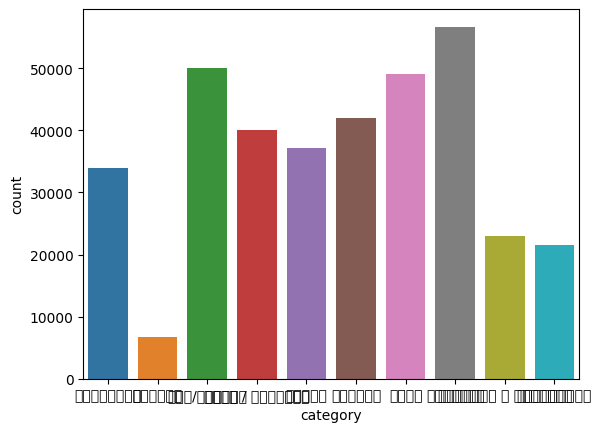

In [17]:
sns.countplot(data=df, x='category')

The plot is not understanding nepali language, so lets map the catgeories to numbers

In [18]:
df["category"].value_counts()

category
राजनीति              56680
देश/प्रदेश           49979
समाज                 49062
खेलकुद               42009
अर्थ / वाणिज्य       40004
विश्व                37158
मनोरञ्जन             33949
विज्ञान र प्रविधि    23027
स्वास्थ्य            21490
शिक्षा                6691
Name: count, dtype: int64

The number of samples for catgeory "शिक्षा" is extremely low, so lets just remove it from the dataset altogether

Also, I found that data relating to "देश/प्रदेश" is also pretty bad. Most of them are about just local news which repeats the same as news from other categories.<br>
So, I am going to remove it too

In [19]:
len(df["category"])

360049

In [20]:
df = df[df["category"] != "शिक्षा"]
df = df[df["category"] != "शिक्षा"]

In [21]:
category_mapping = {
    "मनोरञ्जन": 0,
#     "देश/प्रदेश": 1,
    "अर्थ / वाणिज्य": 1,
    "विश्व": 2,
    "खेलकुद": 3,
    "समाज": 4,
    "राजनीति": 5,
    "विज्ञान र प्रविधि": 6,
    "स्वास्थ्य": 7,
} 

In [22]:
CONSTANTS["total_categories"] = 8

In [23]:
df["category"] = df["category"].map(category_mapping)

Now lets look at the distribution

<Axes: xlabel='category', ylabel='count'>

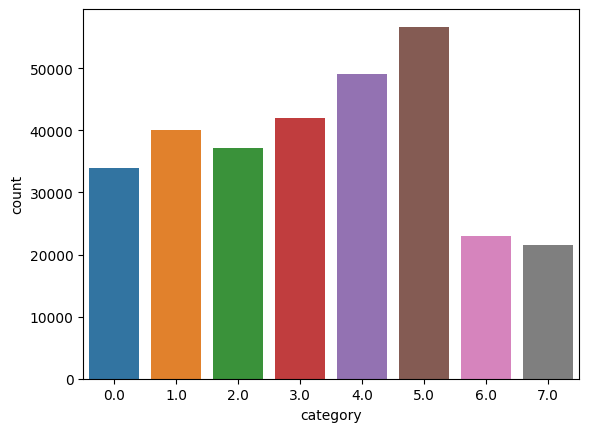

In [24]:
sns.countplot(data=df, x='category')

In [25]:
df["category"].value_counts()

category
5.0    56680
4.0    49062
3.0    42009
1.0    40004
2.0    37158
0.0    33949
6.0    23027
7.0    21490
Name: count, dtype: int64

Our data is highly imbalanced, so lets perform random undersampling so that maximum number of instances for each catgeory is atmost 25K

In [26]:
def random_undersampling(data, random_state):
    if len(data) > 25000:
        return data.sample(25000, random_state=random_state)
    return data

In [27]:
df_balanced = pd.DataFrame(columns=['news_no_stopwords', 'category'])
for i in range(CONSTANTS["total_categories"]):
    res = random_undersampling(df[df["category"] == i], i * np.random.randint(100))
    if df_balanced.empty == True:
        df_balanced = res
    else:
        df_balanced = pd.concat([df_balanced, res], ignore_index=True)

In [28]:
df_balanced["category"].value_counts()

category
0.0    25000
1.0    25000
2.0    25000
3.0    25000
4.0    25000
5.0    25000
6.0    23027
7.0    21490
Name: count, dtype: int64

Now, our dataset has been balanced.<br>
Lets shuffle the dataset so that their order of news from same categories is not simulatenous

In [29]:
df_balanced.head()

,news_no_stopwords,category,length
0,नो नो नो फेक दयाट इज फेक फेक न्युज फेक मिडिया ...,0.0,265
1,रोहित शेट्टी निर्देशित गोलमाल अगेन प्रदर्शनको ...,0.0,198
2,नेपाल संस्करण कार्कीले जितेकी दक्ष ईन्टेरनेशनल...,0.0,264
3,बलिउड नायिका आलिया भट्ट सोसल मिडियामा निकै सक्...,0.0,124
4,मुम्बईको थिएटरमा फिल्म गान्धी गोडसे युद्ध स्क्...,0.0,118


In [30]:
for i in range(20):
    df_balanced = df_balanced.sample(frac=1)

In [31]:
df_balanced.head()

,news_no_stopwords,category,length
55224,चीनले नेपालसँग द्विपक्षीय रणनीतिक सहयोगात्मक स...,2.0,136
108513,बाघको आक्रमणबाट बेपत्ता महिलाको शव घण्टापछि फे...,4.0,132
194271,काठमाडौं बरिष्ठ हाडजोर्नी विशेषज्ञ एवं चिकित्स...,7.0,620
65370,संयुक्त राज्य अमेरिकाले युक्रेन द्वन्दवमा प्रत...,2.0,68
166982,सरकारले श्रम व्यवसायजन्य सुरक्षा विभागलाई पूर्...,6.0,325


We will train our model to predict its catgeory using news with maximum length of 250 .<br>
So, any news of length >250, we will slice it to be of required length.<br>
Similarly, news of length <250 will be extended to to be of required length by padding 0s

Now lets split our dataset into train(70%), validation set(12.5%) and test set(12.5%)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_val_test, y_train, y_val_test = train_test_split(df_balanced['news_no_stopwords'], df_balanced['category'], test_size=0.20, random_state=21, stratify=df_balanced["category"], shuffle=True)

In [34]:
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=28, stratify=y_val_test, shuffle=True)

In [35]:
X_train.shape, X_val.shape, X_test.shape 

((155613,), (19452,), (19452,))

Now we will create our tokenizer

In [36]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [37]:
tokenizer = Tokenizer(num_words=52000)
tokenizer.fit_on_texts(list(X_train))

In [38]:
CONSTANTS["voc_size"] = 52000

Now we convert our words to integers

In [39]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_val_seq = tokenizer.texts_to_sequences(X_val)

Finally we will pad our sequences so that all the inputs are of same length, 250

In [40]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [41]:
X_train_pad_seq = pad_sequences(X_train_seq,  maxlen=CONSTANTS["max_news_length"], padding='post')
X_test_pad_seq = pad_sequences(X_test_seq,  maxlen=CONSTANTS["max_news_length"], padding='post')
X_val_pad_seq = pad_sequences(X_val_seq,  maxlen=CONSTANTS["max_news_length"], padding='post')

In [42]:
X_train_pad_seq.shape, X_val_pad_seq.shape, X_test_pad_seq.shape

((155613, 300), (19452, 300), (19452, 300))

In [43]:
CONSTANTS["total_categories"] = 8

If target variables are simply a list of targets. Eg: [1, 2, 0] then, we can use the sparse catgeorical crossentropy loss

Similarly, we can only one-hot-encode each target value in which case we would use categorical crossentropy loss

In [44]:
y_train = tf.keras.utils.to_categorical(y_train, CONSTANTS["total_categories"])
y_val = tf.keras.utils.to_categorical(y_val, CONSTANTS["total_categories"])
y_test = tf.keras.utils.to_categorical(y_test, CONSTANTS["total_categories"])

In [45]:
y_train.shape, y_val.shape, y_test.shape

((155613, 8), (19452, 8), (19452, 8))

Now lets create our LSTM model for news classification

In [46]:
CONSTANTS["embedding_dim"] = 50
CONSTANTS["latent_dim"] = 8

In [47]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(CONSTANTS["voc_size"], CONSTANTS["embedding_dim"], trainable=True, input_length=CONSTANTS["max_news_length"], name="Embedding_Layer"))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(CONSTANTS["latent_dim"], return_sequences=False, dropout=0.2, recurrent_dropout=0.2, name="BiLSTM_Layer")))
model.add(tf.keras.layers.Dense(CONSTANTS["total_categories"], activation='softmax', name="Softmax_Layer"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Embedding_Layer (Embedding  (None, 300, 50)           2600000   
 )                                                               
                                                                 
 bidirectional (Bidirection  (None, 16)                3776      
 al)                                                             
                                                                 
 Softmax_Layer (Dense)       (None, 8)                 136       
                                                                 
Total params: 2603912 (9.93 MB)
Trainable params: 2603912 (9.93 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


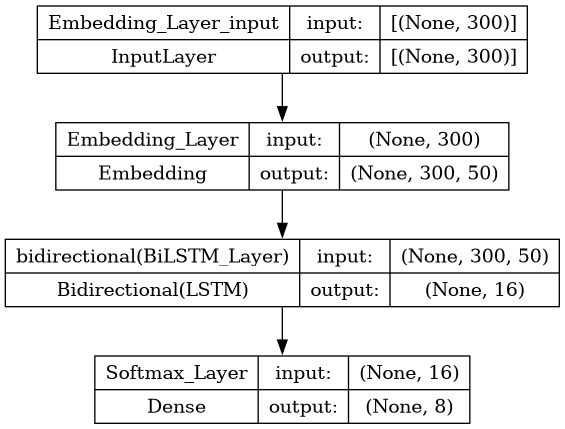

In [48]:
tf.keras.utils.plot_model(model, to_file='/kaggle/working/model_architecture.png', show_shapes=True)

In [49]:
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy', tf.keras.metrics.F1Score(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
              )

In [50]:
CONSTANTS["batch_size"] = 512
CONSTANTS["epochs"] = 16
CONSTANTS["patience"] = 3

We will train using early stopping

In [51]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=CONSTANTS["patience"])
cp = tf.keras.callbacks.ModelCheckpoint("/kaggle/working/NepaliNewsClassifier", monitor="val_loss", mode="min", save_best_only=True)

In [52]:
history = model.fit(X_train_pad_seq, y_train,
                    batch_size=CONSTANTS["batch_size"],
                    epochs=CONSTANTS["epochs"],
                    validation_data=(X_val_pad_seq, y_val),
                    callbacks=[es, cp])

Epoch 1/16


I0000 00:00:1708950676.080821      66 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


304/304 [==============================] - 529s 2s/step - loss: 1.5320 - accuracy: 0.5269 - f1_score: 0.4937 - precision: 0.9467 - recall: 0.0548 - val_loss: 1.0416 - val_accuracy: 0.7233 - val_f1_score: 0.6949 - val_precision: 0.9352 - val_recall: 0.2856
Epoch 2/16
304/304 [==============================] - 505s 2s/step - loss: 0.8169 - accuracy: 0.7756 - f1_score: 0.7632 - precision: 0.9080 - recall: 0.5372 - val_loss: 0.6728 - val_accuracy: 0.7991 - val_f1_score: 0.7909 - val_precision: 0.8822 - val_recall: 0.6975
Epoch 3/16
304/304 [==============================] - 490s 2s/step - loss: 0.5319 - accuracy: 0.8552 - f1_score: 0.8531 - precision: 0.9023 - recall: 0.7895 - val_loss: 0.5372 - val_accuracy: 0.8461 - val_f1_score: 0.8446 - val_precision: 0.8775 - val_recall: 0.8161
Epoch 4/16
304/304 [==============================] - 485s 2s/step - loss: 0.3993 - accuracy: 0.8909 - f1_score: 0.8899 - precision: 0.9127 - recall: 0.8682 - val_loss: 0.4821 - val_accuracy: 0.8570 - val_f1_sc

Now lets evalaute our model on the test set

In [53]:
model.evaluate(X_test_pad_seq, y_test)

608/608 [==============================] - 79s 130ms/step - loss: 0.4930 - accuracy: 0.8618 - f1_score: 0.8607 - precision: 0.8712 - recall: 0.8538


[0.4930418133735657,
 0.861762285232544,
 array([0.9491797 , 0.79395163, 0.89246666, 0.9772182 , 0.69028383,
        0.8656119 , 0.87336427, 0.8435562 ], dtype=float32),
 0.8711708188056946,
 0.8537939786911011]

Finally, lets save our tokenizer, CONSTANTS

In [54]:
import io, json, pickle

In [55]:
with open('/kaggle/working/train_history.pkl', 'wb') as hist:
    pickle.dump(history.history, hist)

In [56]:
# Convert and write JSON object to file
with open("/kaggle/working/constants.json", "w") as const: 
    json.dump(CONSTANTS, const)

In [57]:
with io.open('/kaggle/working/tokenizer.json', 'w', encoding='utf-8') as tok:
    tok.write(json.dumps(tokenizer.to_json(), ensure_ascii=False))